<a href="https://www.kaggle.com/code/shedai/intro-textprocesing?scriptVersionId=247600244" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import re 
s = "Turkcell"

match = re.search("cell", s) 

print("Start Index:", match.start()) 
print("End Index:", match.end()) 

Start Index: 4
End Index: 8


In [3]:
import re 
s = "fljasf@fljasdf.com"
match = re.search("^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})", s) 
print("Start Index:", match.start()) 
print("End Index:", match.end()) 

Start Index: 0
End Index: 18


In [4]:
import re
regex = r"([a-zA-Z]+) (\d+)"

match = re.search(regex, "I was born on June 24")
if match != None:
    print ("Match at index %s, %s" % (match.start(), match.end()))
    print ("Full match: %s" % (match.group(0)))
    print ("Month: %s" % (match.group(1)))
    print ("Day: %s" % (match.group(2)))

else: 
    print ("The regex pattern does not match.")

Match at index 14, 21
Full match: June 24
Month: June
Day: 24


In [5]:
import nltk
from bs4 import BeautifulSoup
from urllib.request import urlopen
raw = urlopen("https://www.turkcellesirket.com/destek-merkezi").read()

raw1 = BeautifulSoup(raw)
raw2 = raw1.get_text()
#print(raw2)

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5}).([a-zA-Z]{2,5})")
tokenizer.tokenize(raw2)


[('destek', 'eplatform', 'com', 'tr')]

In [6]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
# corpus, k√ºlliyat, derlem
ans = "Turkcell ile baƒülan hayata"
ans2 = "Turkcell ile d√ºnyalar senin olsun"
ans3 = "Turkcell ile Turkcell calisiyor"
ans4 = "cok Turkcell hareketler"
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform([ans,ans2,ans3,ans4]).toarray()
print(X)
X2 = matrix.transform(["Turkcelli cok seviyorum"]).toarray()
print(X2)

print(matrix.get_feature_names_out())

[[1 0 0 0 0 1 1 0 0 1]
 [0 0 0 1 0 0 1 1 1 1]
 [0 1 0 0 0 0 1 0 0 2]
 [0 0 1 0 1 0 0 0 0 1]]
[[0 0 1 0 0 0 0 0 0 0]]
['baƒülan' 'calisiyor' 'cok' 'd√ºnyalar' 'hareketler' 'hayata' 'ile' 'olsun'
 'senin' 'turkcell']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# √ñrnek veri k√ºmesi (pozitif ve negatif c√ºmleler)
# Corpus / k√ºlliyat / derlem
texts = [
    "I love this product",       # pozitif
    "This is an amazing movie",  # pozitif
    "I am very happy with the service",  # pozitif
    "I hate this thing",         # negatif
    "This is the worst experience ever", # negatif
    "I am not happy with this",  # negatif
    "I feel wonderful", #positif
    "I love the product", #positif
    "Great this product is awesome", #positif
    "Great I hate this product"  #negatif
]
labels = [1, 1, 1, 0, 0, 0, 1, 1, 1,0]  # 1 = pozitif, 0 = negatif

# Metinleri vekt√∂re √ßevir
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
# Veri setini eƒüitim/test olarak ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Lojistik regresyon modeli
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yap ve sonucu deƒüerlendir
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Yeni metinleri tahmin et
new_texts = ["I love the experience", "I feel terrible", "What a wonderful day", "This is not good"]
new_X = vectorizer.transform(new_texts)
predictions = model.predict(new_X)

# Sonu√ßlarƒ± g√∂ster
for text, label in zip(new_texts, predictions):
    sentiment = "Pozitif" if label == 1 else "Negatif"
    print(f"'{text}' -> {sentiment}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

'I love the experience' -> Pozitif
'I feel terrible' -> Pozitif
'What a wonderful day' -> Pozitif
'This is not good' -> Negatif


In [8]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0]])

In [9]:
print(vectorizer.get_feature_names_out())

['am' 'amazing' 'an' 'awesome' 'ever' 'experience' 'feel' 'great' 'happy'
 'hate' 'is' 'love' 'movie' 'not' 'product' 'service' 'the' 'thing' 'this'
 'very' 'with' 'wonderful' 'worst']


In [10]:
from textblob import TextBlob

# ƒ∞ngilizce √∂rnekler
texts = [
    "I love this product",
    "This is terrible",
    "What a great day!",
    "I hate this",
    "It's okay, not bad",
    "Great it does not work"
]

print("Sentiment Analizi (TextBlob):")
for text in texts:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    label = "Pozitif" if polarity > 0 else "Negatif" if polarity < 0 else "N√∂tr"
    print(f"'{text}' -> {label} ({polarity:.2f})")

Sentiment Analizi (TextBlob):
'I love this product' -> Pozitif (0.50)
'This is terrible' -> Negatif (-1.00)
'What a great day!' -> Pozitif (1.00)
'I hate this' -> Negatif (-0.80)
'It's okay, not bad' -> Pozitif (0.42)
'Great it does not work' -> Pozitif (0.80)


# ƒ∞lk Transformer Denemesi ve Sentiment Polarity

In [11]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# 1. Hƒ±zlƒ± prototipleme i√ßin pipeline kullanƒ±mƒ±
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# 2. √ñrnek c√ºmle
text = "Great it does not work" #chain of thought, reasoning
# "I hate to hurt someone"
# hurt someone (action) -> sentiment

# 3. Tahmin yap
result = classifier(text)
print("Sentiment Prediction:", result)

# 4. Alternatif olarak model ve tokenizer'ƒ± doƒürudan y√ºkle (geli≈ümi≈ü kullanƒ±m)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# 5. Tokenle≈ütirme ve Tensor'a d√∂n√º≈üt√ºrme
inputs = tokenizer(text, return_tensors="pt")

# 6. Modelin tahmin √ßƒ±ktƒ±sƒ±nƒ± alma
with torch.no_grad():
    logits = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)

# 7. Sonu√ßlarƒ± yazdƒ±rma
labels = ["NEGATIVE", "POSITIVE"]
predicted_label = labels[probabilities.argmax()]
print(f"Detailed Prediction: {predicted_label} ({probabilities.max().item()*100:.2f}%)")


2025-06-27 04:39:01.816092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750999142.065225      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750999142.138527      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment Prediction: [{'label': 'NEGATIVE', 'score': 0.999415397644043}]
Detailed Prediction: NEGATIVE (99.94%)


# CBOW ve Skip-Gram

In [12]:
from gensim.models import Word2Vec

# 1. Eƒüitim verisi: k√º√ß√ºk ve sembolik bir metin k√ºmesi
corpus = [
    ["king", "is", "a", "strong", "man"],
    ["queen", "is", "a", "wise", "woman"],
    ["man", "and", "woman", "are", "human"],
    ["king", "and", "queen", "rule", "the", "kingdom"],
    ["queen", "rules", "with", "wisdom"],
    ["man", "is", "mortal"],
    ["woman", "is", "mortal"]
]

# 2. Word2Vec modelini eƒüit (skip-gram = sg=1)
model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)

# 3. √ñrnek: Benzer kelimeleri bulma
print("Benzer kelimeler (king):")
for word, score in model.wv.most_similar("king"):
    print(f"  {word:>8} ‚Üí {score:.3f}")

# 4. Anlamsal √ßƒ±karƒ±m √∂rneƒüi: king - man + woman ‚âà ?
print("\nAnlamsal Analojiler:")
for word, score in model.wv.most_similar(positive=["king", "woman"], negative=["man"]):
    print(f"  {word:>8} ‚Üí {score:.3f}")
"""
# 5. √ñrnek: Benzer kelimeleri bulma : turkcell
print("Benzer kelimeler (turkcell):")
for word, score in model.wv.most_similar("turkcell"):
    print(f"  {word:>8} ‚Üí {score:.3f}")

# 6. √ñrnek: Benzer kelimeleri bulma : turkcell
print("Benzer kelimeler (hascelik):")
for word, score in model.wv.most_similar("hascelik"):
    print(f"  {word:>8} ‚Üí {score:.3f}")
"""

Benzer kelimeler (king):
     human ‚Üí 0.185
      with ‚Üí 0.166
    mortal ‚Üí 0.137
        is ‚Üí 0.132
       the ‚Üí 0.118
      wise ‚Üí 0.115
       and ‚Üí 0.113
      rule ‚Üí 0.096
     queen ‚Üí 0.045
         a ‚Üí 0.030

Anlamsal Analojiler:
      wise ‚Üí 0.131
      with ‚Üí 0.121
       and ‚Üí 0.056
    mortal ‚Üí 0.055
       the ‚Üí 0.049
         a ‚Üí 0.043
        is ‚Üí 0.027
       are ‚Üí 0.021
     queen ‚Üí 0.015
     rules ‚Üí -0.029


'\n# 5. √ñrnek: Benzer kelimeleri bulma : turkcell\nprint("Benzer kelimeler (turkcell):")\nfor word, score in model.wv.most_similar("turkcell"):\n    print(f"  {word:>8} ‚Üí {score:.3f}")\n\n# 6. √ñrnek: Benzer kelimeleri bulma : turkcell\nprint("Benzer kelimeler (hascelik):")\nfor word, score in model.wv.most_similar("hascelik"):\n    print(f"  {word:>8} ‚Üí {score:.3f}")\n'

In [13]:
print('king', 'queen', model.wv.similarity('king', 'queen'))
print('wisdom', 'rules', model.wv.similarity('wisdom', 'rules'))

king queen 0.0449173
wisdom rules 0.05136855


CBOW modeli, bir kelimenin etrafƒ±ndaki baƒülam (context) kelimelerine bakarak hedef kelimeyi tahmin etmeye √ßalƒ±≈üƒ±r. Daha hƒ±zlƒ± eƒüitilir ve sƒ±k ge√ßen kelimelerde iyi sonu√ß verir.


Skip-Gram modeli ise hedef kelimeye bakarak onun baƒülamƒ±ndaki kelimeleri tahmin etmeye √ßalƒ±≈üƒ±r. √ñzellikle seyrek g√∂r√ºlen kelimeler i√ßin daha etkili temsil √∂ƒürenir, ancak eƒüitim s√ºresi biraz daha uzundur.

human, mortal, wise: Bu kelimeler, "king" kavramƒ±na ait nitelikleri (insani √∂zellikleri) yansƒ±tƒ±yor. K√º√ß√ºk korpusta "man", "king", "human", "mortal" gibi kelimeler yan yana ge√ßtiƒüi i√ßin, model bu kelimeleri vekt√∂r uzayƒ±nda yakƒ±nla≈ütƒ±rmƒ±≈ü.


with, is, the, a, and gibi kelimeler ise y√ºksek frekanslƒ± baƒüla√ßlar ve yardƒ±mcƒ± fiiller olduƒüundan bir√ßok c√ºmlede ge√ßtiƒüi i√ßin "king" ile korelasyon g√∂stermi≈ü olabilir. Bu, k√º√ß√ºk veri setlerinde yaygƒ±ndƒ±r.


queen'in listede √ßƒ±kmasƒ± modelin semantik benzerliƒüi algƒ±lamaya ba≈üladƒ±ƒüƒ±nƒ± g√∂sterir. Ancak "queen"'in skorunun d√º≈ü√ºk olmasƒ±, "king" ve "queen" kelimelerinin korpusta birlikte yeterince g√º√ßl√º bir baƒülamda yer almadƒ±ƒüƒ±nƒ± g√∂steriyor.

Sonu√ß:
Model "king" kelimesinin insani ve y√∂netici √∂zelliklerini i√ßeren kelimeleri doƒüru ≈üekilde ili≈ükilendirmi≈ü, ancak baƒülamsal zenginlik sƒ±nƒ±rlƒ± olduƒüu i√ßin "queen" gibi g√º√ßl√º semantik e≈üdeƒüerler d√º≈ü√ºk skorda kalmƒ±≈ü.

# GloVe

In [14]:
import gensim.downloader as api

# GloVe modelini indir ve y√ºkle (50 boyutlu embedding vekt√∂rleri)
glove_model = api.load("glove-wiki-gigaword-50")

# 'king' kelimesine benzer kelimeler
print("Benzer kelimeler (king):")
for word, score in glove_model.most_similar("king"):
    print(f"{word:>10} ‚Üí {score:.3f}")

# Anlamsal analoji: king - man + woman ‚âà ?
print("\nAnlamsal Analoji (king - man + woman ‚âà ?):")
for word, score in glove_model.most_similar(positive=["king", "woman"], negative=["man"]):
    print(f"{word:>10} ‚Üí {score:.3f}")
    
# 'king' kelimesine benzer kelimeler
print("Benzer kelimeler (evren):")
# des , est , sti , ici, cio
for word, score in glove_model.most_similar("evren"):
    print(f"{word:>10} ‚Üí {score:.3f}")



# Anlamsal analoji: king - man + woman ‚âà ?
print("\nAnlamsal Analoji (king - man + woman ‚âà ?):")
for word, score in glove_model.most_similar(positive=["king", "woman"], negative=["man"]):
    print(f"{word:>10} ‚Üí {score:.3f}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Benzer kelimeler (king):
    prince ‚Üí 0.824
     queen ‚Üí 0.784
        ii ‚Üí 0.775
   emperor ‚Üí 0.774
       son ‚Üí 0.767
     uncle ‚Üí 0.763
   kingdom ‚Üí 0.754
    throne ‚Üí 0.754
   brother ‚Üí 0.749
     ruler ‚Üí 0.743

Anlamsal Analoji (king - man + woman ‚âà ?):
     queen ‚Üí 0.852
    throne ‚Üí 0.766
    prince ‚Üí 0.759
  daughter ‚Üí 0.747
 elizabeth ‚Üí 0.746
  princess ‚Üí 0.742
   kingdom ‚Üí 0.734
   monarch ‚Üí 0.721
    eldest ‚Üí 0.718
     widow ‚Üí 0.710
Benzer kelimeler (evren):
     kenan ‚Üí 0.814
      k.s. ‚Üí 0.755
    fayose ‚Üí 0.725
 tsunekazu ‚Üí 0.694
bjelke-petersen ‚Üí 0.689
     maada ‚Üí 0.685
   scalise ‚Üí 0.683
  doo-hwan ‚Üí 0.683
     kumba ‚Üí 0.674
   saitoti ‚Üí 0.668

Anlamsal Analoji (king - man + woman ‚âà ?):
     queen ‚Üí 0.852
    throne ‚Üí 0.766
    prince ‚Üí 0.759
  daughter ‚Üí 0.747
 elizabeth ‚Üí 0.746
  princess ‚Üí 0.742
   kingdom ‚Ü

GloVe Nedir?

GloVe, Word2Vec‚Äôten farklƒ± olarak kelimeler arasƒ±ndaki birlikte g√∂r√ºnme sƒ±klƒ±klarƒ±nƒ± (co-occurrence) kullanarak global istatistikleri i√ßeren vekt√∂rler √ºretir. Modelin kendisi tahmine dayalƒ± deƒüil, istatistik tabanlƒ±dƒ±r.



Bu Kod Ne Yapar?

"king" kelimesine en yakƒ±n vekt√∂rleri listeler (semantik benzerlik).

"king" - "man" + "woman" i≈ülemini yaparak "queen" kelimesine ula≈ümayƒ± hedefler (vekt√∂rler arasƒ± anlamsal aritmetik).

# FastText: Alt-kelime (n-gram) temelli yakla≈üƒ±m

In [15]:
from gensim.models import FastText

# 1. K√º√ß√ºk bir √∂rnek korpus: anlamlƒ± baƒülamlar i√ßeren kƒ±sa c√ºmleler
corpus = [
    ["king", "is", "a", "strong", "man"],
    ["queen", "is", "a", "wise", "woman"],
    ["man", "and", "woman", "are", "human"],
    ["king", "and", "queen", "rule", "the", "kingdom"],
    ["queen", "rules", "with", "wisdom"],
    ["man", "is", "mortal"],
    ["woman", "is", "mortal"],
    ["turkcell"]
]

# 2. FastText modelini eƒüitiyoruz
# sg=1 ‚Üí Skip-gram (baƒülamdan hedefi √∂ƒüren), size=50 ‚Üí 50 boyutlu vekt√∂r, window=2 ‚Üí baƒülam penceresi
fasttext_model = FastText(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)

# 3. 'king' kelimesine en benzer kelimeler
print("FastText ile 'king' kelimesine en benzer kelimeler:")
for word, sim in fasttext_model.wv.most_similar("king"):
    print(f"  {word:>10} ‚Üí {sim:.3f}")

# 4. Bilinmeyen kelime (OOV) √∂rneƒüi: 'kingship'
print("\nModelde hi√ß ge√ßmeyen 'kingship' kelimesinin vekt√∂r√º ve benzerleri:")
print("Vekt√∂r√ºn ilk 5 boyutu:", fasttext_model.wv["kingship"][:5])  # Alt-kelime birle≈ütirerek √ºretir
for word, sim in fasttext_model.wv.most_similar("kingship"):
    print(f"  {word:>10} ‚Üí {sim:.3f}")

# 5. Aynƒ± k√∂kten gelen kelimeler: 'run', 'running', 'runner'
print("\nBenzer k√∂k yapƒ±daki kelimeler i√ßin √∂rnek:")
words = ["run", "running", "runner","hascelik","turkcell"]
# has, asc , cel, eli , lik
for word in words:
    print(f"\n'{word}' kelimesine en benzer kelimeler:")
    for sim_word, sim in fasttext_model.wv.most_similar(word):
        print(f"  {sim_word:>10} ‚Üí {sim:.3f}")


FastText ile 'king' kelimesine en benzer kelimeler:
     kingdom ‚Üí 0.355
         are ‚Üí 0.148
      strong ‚Üí 0.110
       queen ‚Üí 0.085
          is ‚Üí 0.066
    turkcell ‚Üí 0.059
      mortal ‚Üí 0.051
      wisdom ‚Üí -0.054
           a ‚Üí -0.069
        rule ‚Üí -0.088

Modelde hi√ß ge√ßmeyen 'kingship' kelimesinin vekt√∂r√º ve benzerleri:
Vekt√∂r√ºn ilk 5 boyutu: [-0.00028552  0.00256423 -0.00208997 -0.001915    0.00142639]
        king ‚Üí 0.502
    turkcell ‚Üí 0.246
     kingdom ‚Üí 0.220
        wise ‚Üí 0.143
         and ‚Üí 0.120
      mortal ‚Üí 0.067
         are ‚Üí 0.048
           a ‚Üí 0.048
        with ‚Üí 0.006
          is ‚Üí -0.018

Benzer k√∂k yapƒ±daki kelimeler i√ßin √∂rnek:

'run' kelimesine en benzer kelimeler:
       rules ‚Üí 0.235
         man ‚Üí 0.229
       woman ‚Üí 0.174
       queen ‚Üí 0.160
        wise ‚Üí 0.137
      mortal ‚Üí 0.125
     kingdom ‚Üí 0.123
      wisdom ‚Üí 0.121
         are ‚Üí 0.103
       human ‚Üí 0.094

'running

**Koddaki kazanƒ±mlar ve a√ßƒ±klamalar:**

1Ô∏è‚É£	Model, kelimeleri karakter n-gram‚Äôlara b√∂lerek her par√ßayƒ± ayrƒ± ayrƒ± temsil eder

2Ô∏è‚É£	Eƒüitilmi≈ü FastText modeli, kelimeyi g√∂rmese bile par√ßalarƒ±na (√∂rneƒüin "king", "ship") bakarak anlamlƒ± vekt√∂r √ßƒ±karƒ±r

3Ô∏è‚É£	Bu sayede ‚Äúkingship‚Äù, ‚Äúrulingness‚Äù, ‚Äúrunnability‚Äù gibi OOV kelimelere de vekt√∂r verir

4Ô∏è‚É£	FastText morfolojik t√ºrevlerde (run-running-runner) performanslƒ±dƒ±r

5Ô∏è‚É£	Word2Vec ile kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda veri fakirliƒüinde ve diller arasƒ± esneklikte avantajlƒ±dƒ±r


# Embedding G√∂rselle≈ütirme

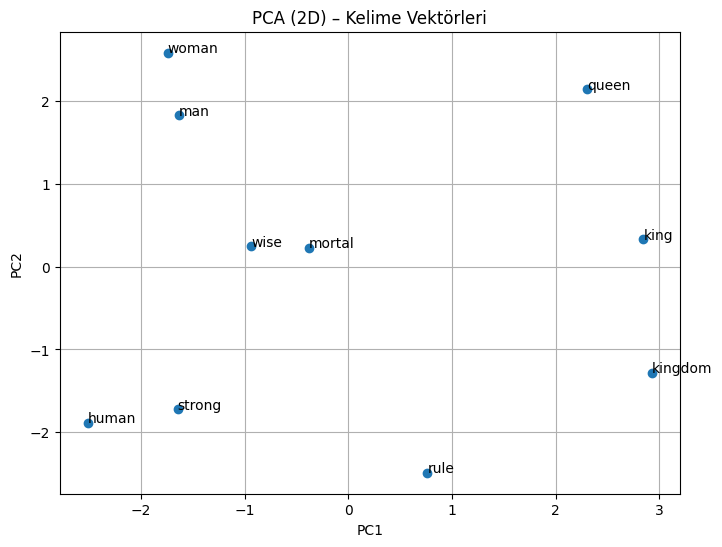

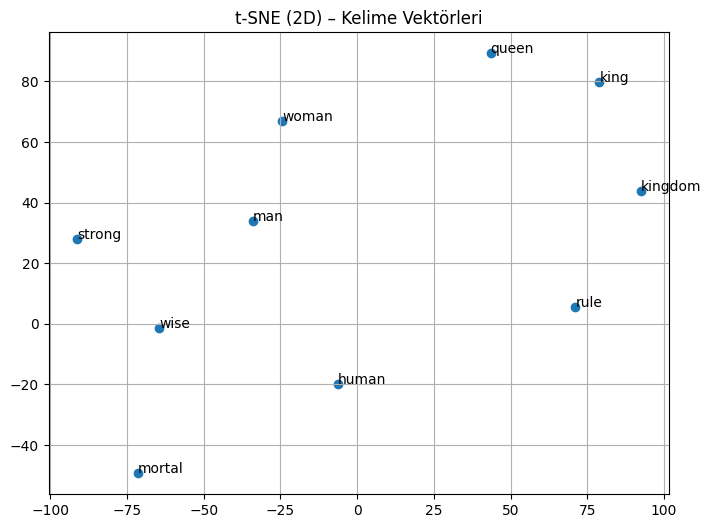

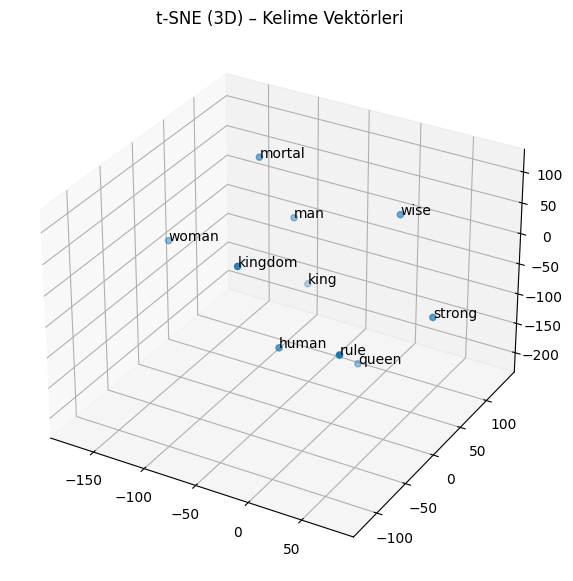

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# ‚úÖ Model se√ßenekleri: word2vec_model, fasttext_model, glove_model
model =  glove_model #model #glove_model #fasttext_model #[ glove_model, model ]  # buraya model adƒ±nƒ± deƒüi≈ütirerek test edebilirsin

# G√∂rselle≈ütirilecek kelimeler (hepsi modelde olmalƒ±)
#glove words = ["king", "queen", "man", "woman", "strong", "wise", "human", "rule", "mortal", "power", "kingdom"]
words = ["king", "queen", "man", "woman", "strong", "wise", "human", "rule", "mortal",  "kingdom"]


# Vekt√∂rleri topla
#glove_model.most_similar("king")
# word_vectors = np.array([model.wv[word] for word in words])
word_vectors = np.array([glove_model[word] for word in words])

# 1Ô∏è‚É£ PCA ‚Äì 2D G√∂rselle≈ütirme
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA (2D) ‚Äì Kelime Vekt√∂rleri")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 2Ô∏è‚É£ t-SNE ‚Äì 2D G√∂rselle≈ütirme
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE (2D) ‚Äì Kelime Vekt√∂rleri")
plt.grid(True)
plt.show()

# 3Ô∏è‚É£ t-SNE ‚Äì 3D G√∂rselle≈ütirme
tsne_3d = TSNE(n_components=3, perplexity=5, random_state=42)
tsne_3d_result = tsne_3d.fit_transform(word_vectors)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_3d_result[:, 0], tsne_3d_result[:, 1], tsne_3d_result[:, 2])
for i, word in enumerate(words):
    ax.text(tsne_3d_result[i, 0], tsne_3d_result[i, 1], tsne_3d_result[i, 2], word)
ax.set_title("t-SNE (3D) ‚Äì Kelime Vekt√∂rleri")
plt.show()


**Kazanƒ±mlar:**

PCA: Varyansƒ±n en y√ºksek olduƒüu iki bile≈üen √ºzerinden lineer projeksiyon.

t-SNE: Lokal semantik k√ºmelenmeleri g√∂steren daha sezgisel bir projeksiyon.

3D t-SNE: Daha y√ºksek boyutta (√∂r. 50d, 100d) vekt√∂rlerin topolojisini g√∂rselle≈ütirme imk√¢nƒ±.



# BERT / GPT Ve Baƒülamsal Embedding 

In [17]:
!pip install transformers torch scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.3/56.3 MB 31.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 127.9/127.9 MB 13.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [18]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1. BERT modeli ve tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# 2. Baƒülam c√ºmleleri
sentence1 = "I deposited money at the bank."       # Finansal anlam
sentence2 = "The boat reached the river bank."     # Coƒürafi anlam

# 3. Tokenize et
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

# 4. Modelden √ßƒ±ktƒ±lar
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# 5. Tokenleri bul
tokens1 = tokenizer.convert_ids_to_tokens(inputs1["input_ids"][0])
tokens2 = tokenizer.convert_ids_to_tokens(inputs2["input_ids"][0])

# 6. "bank" kelimesinin indeksini bul
bank_index1 = tokens1.index("bank")
bank_index2 = tokens2.index("bank")

# 7. Baƒülama duyarlƒ± vekt√∂rleri √ßƒ±kar
vec1 = outputs1.last_hidden_state[0, bank_index1, :].numpy()
vec2 = outputs2.last_hidden_state[0, bank_index2, :].numpy()

# 8. Kosin√ºs benzerliƒüi hesapla
similarity = cosine_similarity([vec1], [vec2])[0][0]

# 9. Sonu√ß
print("Token dizisi 1:", tokens1)
print("Token dizisi 2:", tokens2)
print(f"'bank' kelimesinin baƒülamlara g√∂re benzerliƒüi: {similarity:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Token dizisi 1: ['[CLS]', 'i', 'deposited', 'money', 'at', 'the', 'bank', '.', '[SEP]']
Token dizisi 2: ['[CLS]', 'the', 'boat', 'reached', 'the', 'river', 'bank', '.', '[SEP]']
'bank' kelimesinin baƒülamlara g√∂re benzerliƒüi: 0.5453


# √ñrnek Uygulamalar :
# 1. Metin Sƒ±nƒ±flandƒ±rma

In [19]:
# Gerekli k√ºt√ºphaneler (sadece bir kez y√ºklenmeli)
# pip install gensim transformers scikit-learn torch

from gensim.models import Word2Vec, FastText
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch

# 1. Veri seti
texts = [
    "I love this product", "This is an amazing movie",
    "I am very happy with the service", "I hate this thing",
    "This is the worst experience", "I am not happy with this",
]
labels = [1, 1, 1, 0, 0, 0]

# 2. Tokenize
tokenized = [text.lower().split() for text in texts]

# 3. Word2Vec Modeli
w2v_model = Word2Vec(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=1)
def w2v_embed(text):
    return np.mean([w2v_model.wv[w] for w in text.lower().split() if w in w2v_model.wv], axis=0)

# 4. FastText Modeli
ft_model = FastText(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=1)
def fasttext_embed(text):
    return np.mean([ft_model.wv[w] for w in text.lower().split() if w in ft_model.wv], axis=0)

# 5. BERT Modeli
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
def bert_embed(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 6. √ñzellik vekt√∂rleri
X_w2v = np.array([w2v_embed(t) for t in texts])
X_ft = np.array([fasttext_embed(t) for t in texts])
X_bert = np.array([bert_embed(t) for t in texts])

# 7. Model ve deƒüerlendirme
def evaluate(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f"\n{name} ‚Äì Classification Report:\n{classification_report(y_test, preds)}")

evaluate(X_w2v, labels, "Word2Vec")
evaluate(X_ft, labels, "FastText")
evaluate(X_bert, labels, "BERT")



Word2Vec ‚Äì Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


FastText ‚Äì Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


BERT ‚Äì Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

# √ñrnek Uygulama Alanlarƒ±
# 2. Bilgi √áekme ve Sƒ±ralama 

In [20]:
# Gerekli k√ºt√ºphaneler (daha √∂nce y√ºklenmi≈ü olmalƒ±)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import numpy as np

# =============================================================================
# 1. ADIM: Bilgi Havuzu (Knowledge Base) Olu≈üturma
# =============================================================================
# Bir bilgi havuzumuz olduƒüunu varsayalƒ±m. Bu, SSS (Sƒ±k√ßa Sorulan Sorular),
# √ºr√ºn a√ßƒ±klamalarƒ± veya herhangi bir dok√ºman koleksiyonu olabilir.

knowledge_base = [
    "To reset your password, navigate to the settings page and click 'Forgot Password'.",
    "You can download our mobile application from the Apple App Store or Google Play Store.",
    "Customer support is available 24/7 via live chat or by emailing support@example.com.",
    "We offer three pricing plans: Basic for individuals, Pro for teams, and Enterprise for large organizations.",
    "Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.",
    "Our refund policy allows for a full refund within 30 days of the original purchase.",
    "The new laptop model features a high-resolution display and a long-lasting battery.",
]

# =============================================================================
# 2. ADIM: Kullanƒ±cƒ± Sorgusu
# =============================================================================
# Bir kullanƒ±cƒ±nƒ±n bilgi almak i√ßin yazdƒ±ƒüƒ± sorgu.
user_query = "how can I change my plan?"

print(f"üîπ KULLANICI SORGUSU: '{user_query}'")
print("-" * 50)

# =============================================================================
# 3. ADIM: Vekt√∂rle≈ütirme ve Benzerlik Hesaplama
# =============================================================================
# Farklƒ± embedding tekniklerini kullanarak sorgu ile bilgi havuzundaki her bir
# dok√ºman arasƒ±ndaki anlamsal benzerliƒüi hesaplayacaƒüƒ±z.

# --- Y√∂ntem 1: TF-IDF (Baƒülamdan Yoksun, Anahtar Kelime Tabanlƒ±) ---
try:
    tfidf = TfidfVectorizer()
    # Hem bilgi havuzunu hem de sorguyu aynƒ± vekt√∂r uzayƒ±na d√∂n√º≈üt√ºr
    tfidf_matrix = tfidf.fit_transform(knowledge_base + [user_query])
    # Sorgu vekt√∂r√º (son satƒ±r) ile diƒüer t√ºm dok√ºmanlarƒ±n benzerliƒüini hesapla
    tfidf_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])[0]
except Exception as e:
    print(f"TF-IDF hatasƒ±: {e}")
    tfidf_sim = np.zeros(len(knowledge_base))

# --- Y√∂ntem 2: Word2Vec (Baƒülamdan Yoksun, Kelime Vekt√∂r Ortalamasƒ±) ---
try:
    tokenized_kb = [doc.lower().split() for doc in knowledge_base]
    w2v_model = Word2Vec(sentences=tokenized_kb, vector_size=100, window=5, min_count=1, sg=1)
    
    def get_w2v_vector(text, model):
        words = [w for w in text.lower().split() if w in model.wv]
        return np.mean([model.wv[w] for w in words], axis=0) if words else np.zeros(model.vector_size)

    query_vec_w2v = get_w2v_vector(user_query, w2v_model)
    kb_vecs_w2v = np.array([get_w2v_vector(doc, w2v_model) for doc in knowledge_base])
    w2v_sim = cosine_similarity([query_vec_w2v], kb_vecs_w2v)[0]
except Exception as e:
    print(f"Word2Vec hatasƒ±: {e}")
    w2v_sim = np.zeros(len(knowledge_base))


# --- Y√∂ntem 3: Sentence-BERT (Baƒülama Duyarlƒ±, C√ºmle Seviyesinde) ---
# Bu model, t√ºm c√ºmlenin baƒülamƒ±nƒ± anlayarak tek bir embedding √ºretir.
# Bu, RAG sistemlerinin temelini olu≈üturur.
try:
    sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    # Hem bilgi havuzunu hem de sorguyu vekt√∂rle≈ütir
    embeddings = sbert_model.encode(knowledge_base + [user_query])
    query_embedding = embeddings[-1]
    kb_embeddings = embeddings[:-1]
    # Benzerliƒüi hesapla
    sbert_sim = cosine_similarity([query_embedding], kb_embeddings)[0]
except Exception as e:
    print(f"Sentence-BERT hatasƒ±: {e}")
    sbert_sim = np.zeros(len(knowledge_base))


# =============================================================================
# 4. ADIM: Sonu√ßlarƒ± Sƒ±ralama ve G√∂sterme
# =============================================================================
# Her y√∂ntemin, kullanƒ±cƒ± sorgusuna en uygun bulduƒüu dok√ºmanƒ± g√∂relim.

def display_results(method_name, similarities, docs):
    # Benzerlik skorlarƒ±na g√∂re dok√ºmanlarƒ± sƒ±rala
    # `np.argsort` k√º√ß√ºkten b√ºy√ºƒüe sƒ±raladƒ±ƒüƒ± i√ßin `[::-1]` ile ters √ßeviriyoruz.
    sorted_indices = np.argsort(similarities)[::-1]
    
    print(f"\n‚úÖ {method_name} Sonu√ßlarƒ± (En Uygun Dok√ºmanlar):")
    # En iyi 3 sonucu g√∂sterelim
    for i in range(min(3, len(sorted_indices))):
        idx = sorted_indices[i]
        print(f"  {i+1}. (Skor: {similarities[idx]:.4f}) -> '{docs[idx]}'")

display_results("TF-IDF", tfidf_sim, knowledge_base)
display_results("Word2Vec", w2v_sim, knowledge_base)
display_results("Sentence-BERT", sbert_sim, knowledge_base)

print("\n" + "=" * 50)
print("üîπ SONU√á VE RAG ƒ∞√áƒ∞N TEMEL üîπ")
print("Sentence-BERT gibi baƒülama duyarlƒ± modeller, 'plan' ve 'subscription' kelimelerinin")
print("anlamsal olarak ne kadar yakƒ±n olduƒüunu anladƒ±ƒüƒ± i√ßin en doƒüru sonucu bulur.")
print("RAG sistemleri, bu en uygun dok√ºmanƒ± bir dil modeline (LLM) baƒülam olarak vererek")
print("doƒüal dilde, daha isabetli ve zengin cevaplar √ºretmesini saƒülar.")
print("=" * 50)

üîπ KULLANICI SORGUSU: 'how can I change my plan?'
--------------------------------------------------


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


‚úÖ TF-IDF Sonu√ßlarƒ± (En Uygun Dok√ºmanlar):
  1. (Skor: 0.0645) -> 'You can download our mobile application from the Apple App Store or Google Play Store.'
  2. (Skor: 0.0630) -> 'Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.'
  3. (Skor: 0.0000) -> 'The new laptop model features a high-resolution display and a long-lasting battery.'

‚úÖ Word2Vec Sonu√ßlarƒ± (En Uygun Dok√ºmanlar):
  1. (Skor: 0.3975) -> 'Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.'
  2. (Skor: 0.3094) -> 'You can download our mobile application from the Apple App Store or Google Play Store.'
  3. (Skor: 0.2417) -> 'We offer three pricing plans: Basic for individuals, Pro for teams, and Enterprise for large organizations.'

‚úÖ Sentence-BERT Sonu√ßlarƒ± (En Uygun Dok√ºmanlar):
  1. (Skor: 0.3283) -> 'Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.'


# √ñrnek Uygulama Alanlarƒ±
# 3. Chat Bot'lar

In [21]:
!pip install sentence-transformers gensim scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import numpy as np

# Soru-Cevap verisi
faq_questions = [
    "How can I reset my password?",
    "Where can I download the mobile app?",
    "How to contact customer support?",
    "Tell me about your pricing plans.",
    "Can I upgrade my subscription?",
    "What is your refund policy?"
]

faq_answers = [
    "To reset your password, go to settings and click 'Forgot Password'.",
    "You can download the app from the App Store or Google Play.",
    "You can reach customer support via chat or email.",
    "We offer basic, pro, and enterprise pricing options.",
    "Yes, you can upgrade anytime from your account settings.",
    "We provide full refunds within 30 days of purchase."
]

user_query = "I want to change my plan and pay more."

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(faq_questions + [user_query])
tfidf_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])[0]

# Word2Vec
tokenized_faq = [q.lower().split() for q in faq_questions]
w2v_model = Word2Vec(sentences=tokenized_faq, vector_size=50, window=2, min_count=1, sg=1)
def mean_w2v(text):
    words = text.lower().split()
    vecs = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
    return np.mean(vecs, axis=0)
query_vec = mean_w2v(user_query)
faq_vecs = np.array([mean_w2v(q) for q in faq_questions])
w2v_sim = cosine_similarity([query_vec], faq_vecs)[0]

# Sentence-BERT
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sbert_vecs = sbert_model.encode(faq_questions + [user_query])
sbert_sim = cosine_similarity([sbert_vecs[-1]], sbert_vecs[:-1])[0]

# Kar≈üƒ±la≈ütƒ±rma
def top_match(similarity, method):
    top_idx = np.argmax(similarity)
    print(f"\nüîπ {method} ‚Üí En iyi e≈üle≈üme:")
    print(f" Soru:    {faq_questions[top_idx]}")
    print(f" Yanƒ±t:   {faq_answers[top_idx]}")
    print(f" Skor:    {similarity[top_idx]:.3f}")

top_match(tfidf_sim, "TF-IDF")
top_match(w2v_sim, "Word2Vec")
top_match(sbert_sim, "Sentence-BERT")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


üîπ TF-IDF ‚Üí En iyi e≈üle≈üme:
 Soru:    How to contact customer support?
 Yanƒ±t:   You can reach customer support via chat or email.
 Skor:    0.123

üîπ Word2Vec ‚Üí En iyi e≈üle≈üme:
 Soru:    Can I upgrade my subscription?
 Yanƒ±t:   Yes, you can upgrade anytime from your account settings.
 Skor:    0.475

üîπ Sentence-BERT ‚Üí En iyi e≈üle≈üme:
 Soru:    Tell me about your pricing plans.
 Yanƒ±t:   We offer basic, pro, and enterprise pricing options.
 Skor:    0.428


**Kazanƒ±lmar**

Aynƒ± √ºr√ºn tanƒ±mƒ±na y√∂nelik farklƒ± embedding'lerin √∂neri sƒ±rasƒ±nƒ± nasƒ±l etkilediƒüini g√∂zlemleyebilir.

‚ÄúSound‚Äù, ‚Äúaudio‚Äù, ‚Äúbass‚Äù gibi yakƒ±n kavramlarƒ±n baƒülamda nasƒ±l benze≈ütiƒüini veya ayrƒ±≈ütƒ±ƒüƒ±nƒ± g√∂rebilir.

BERT gibi modellerin baƒülama duyarlƒ±lƒ±ƒüƒ±nƒ±n pratik katkƒ±sƒ±nƒ± anlar.

# Kendi Word Embedding‚Äôini Eƒüitmek

Mevcut durumun tekrarƒ± ve kƒ±sa bir hatƒ±rlama i√ßin :

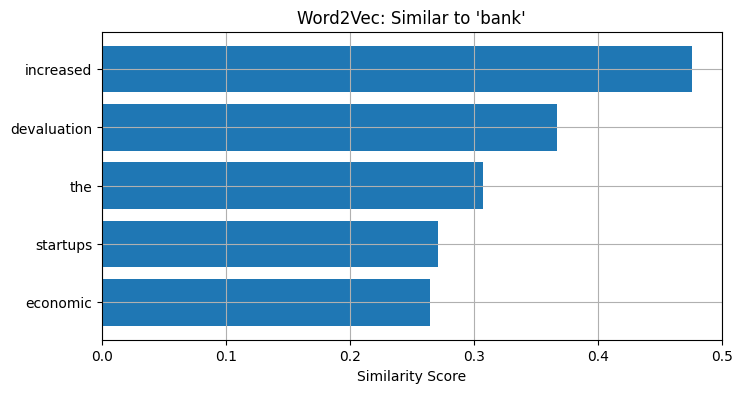

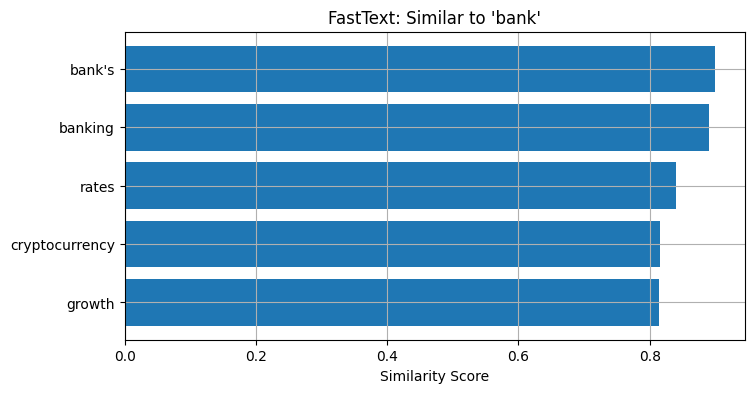

No similar words found in: Word2Vec (min_count=2): Similar to 'bank'

üìê Vector Analogy Examples:
'bank' is to 'fintech' as 'regulations' is to 'mainstream'
'bank' is to 'fintech' as 'regulations' is to 'traditional'


In [23]:
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import numpy as np

# 1. Sekt√∂rel √∂rnek corpus (Finans metinleri)
corpus = [
    "The central bank increased interest rates due to inflation".lower().split(),
    "The financial markets responded with volatility".lower().split(),
    "Banking regulations have been updated by the authorities".lower().split(),
    "Investors are concerned about currency devaluation".lower().split(),
    "Cryptocurrency is becoming more mainstream in fintech".lower().split(),
    "The stock market closed at an all-time high".lower().split(),
    "There is a growing interest in sustainable investments".lower().split(),
    "Fintech startups are disrupting traditional banking".lower().split(),
    "The central bank's monetary policy affects economic growth".lower().split(),
    "Artificial intelligence is transforming financial services".lower().split(),
]

# 2. Word2Vec eƒüitimi (Skip-gram: sg=1)
w2v_model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1, epochs=100)

# 3. Hafifletilmi≈ü FastText (bucket sayƒ±sƒ±nƒ± azaltƒ±yoruz)
ft_model = FastText(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1, epochs=100, bucket=1000)

# 4. Benzerlik fonksiyonu
def get_similarities(model, word="bank"):
    try:
        return model.wv.most_similar(word, topn=5)
    except KeyError:
        return []

# 5. G√∂rselle≈ütirme
def plot_similarities(similarities, title):
    if similarities:
        words, scores = zip(*similarities)
        plt.figure(figsize=(8, 4))
        plt.barh(words[::-1], scores[::-1])
        plt.title(title)
        plt.xlabel("Similarity Score")
        plt.grid(True)
        plt.show()
    else:
        print(f"No similar words found in: {title}")

# 6. Benzer kelimeleri g√∂ster
plot_similarities(get_similarities(w2v_model, "bank"), "Word2Vec: Similar to 'bank'")
plot_similarities(get_similarities(ft_model, "bank"), "FastText: Similar to 'bank'")

# 7. Hiperparametre √∂rneƒüi: min_count etkisi
w2v_mincount2 = Word2Vec(sentences=corpus, vector_size=50, window=5, min_count=2, sg=1, epochs=100)
plot_similarities(get_similarities(w2v_mincount2, "bank"), "Word2Vec (min_count=2): Similar to 'bank'")

# 8. Vekt√∂rel Analojiler
def analogy(model, w1, w2, w3):
    try:
        result = model.wv.most_similar(positive=[w2, w3], negative=[w1], topn=1)
        print(f"'{w1}' is to '{w2}' as '{w3}' is to '{result[0][0]}'")
    except KeyError as e:
        print(f"Analogy error: {e}")

print("\nüìê Vector Analogy Examples:")
analogy(w2v_model, "bank", "fintech", "regulations")
analogy(ft_model, "bank", "fintech", "regulations")


Kendi embedding'imizi eƒüitmek i√ßin : 

**Adƒ±mlar:**

Veri hazƒ±rlƒ±ƒüƒ±

Gensim ile model eƒüitimi

Modelden kelime vekt√∂rlerini alma

Modeli kaydetme ve yeniden y√ºkleme

Benzerlik ve analoji √∂rnekleri

Kullanƒ±m √∂rnekleri (√∂rneƒüin: metin sƒ±nƒ±flandƒ±rma, tavsiye sistemi)



In [24]:
from gensim.models import Word2Vec
import os

# 1. ADIM: Veri Hazƒ±rlƒ±ƒüƒ± (tokenize edilmi≈ü c√ºmleler)
# Sekt√∂rel bir veri k√ºmesi √∂rneƒüi (√∂rneƒüin e-ticaret a√ßƒ±klamalarƒ±)
corpus = [
    "Buy wireless headphones with noise cancellation",
    "The laptop has 16GB RAM and 1TB SSD",
    "Check out our smart watches and fitness bands",
    "Noise cancelling over-ear headphones with deep bass",
    "Budget-friendly tablets and accessories on sale",
    "Gaming mouse with high DPI and RGB lighting",
    "Bluetooth speaker with surround sound",
    "High performance laptop for graphic design",
    "Affordable smart home gadgets",
    "Fitness bands with heart rate monitor",
]
# Hepsini k√º√ß√ºk harfe √ßevirip tokenlere ayƒ±rƒ±yoruz
tokenized_corpus = [sentence.lower().split() for sentence in corpus]

# 2. ADIM: Model Eƒüitimi
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,       # her kelimenin vekt√∂r boyutu
    window=3,              # baƒülam penceresi
    min_count=1,           # en az ge√ßen kelimeler dahil olsun
    sg=1,                  # skip-gram (CBOW i√ßin sg=0)
    epochs=100             # eƒüitim s√ºresi
)

# 3. ADIM: Kelime vekt√∂rleriyle benzerlik √∂rneƒüi
print("\nBenzer kelimeler (headphones):")
for word, score in model.wv.most_similar("headphones", topn=5):
    print(f"  {word:15s} ‚Üí {score:.3f}")

# 4. ADIM: Modeli kaydetme
model_path = "my_custom_embedding.model"
model.save(model_path)
print(f"\nModel '{model_path}' dosyasƒ±na kaydedildi.")

# 5. ADIM: Modeli tekrar y√ºkleme
loaded_model = Word2Vec.load(model_path)

# 6. ADIM: Analojik Anlam Testi (√∂rnek √ßƒ±karƒ±m)
print("\nAnalojik √ßƒ±karƒ±m: 'laptop' is to 'performance' as 'mouse' is to ?")
try:
    result = loaded_model.wv.most_similar(positive=["performance", "mouse"], negative=["laptop"], topn=1)
    print("  Tahmin:", result[0][0])
except KeyError as e:
    print("  Eksik kelime:", e)

# 7. ADIM: Vekt√∂rleri ba≈üka uygulamalarda kullanmak (√∂rnek)
vector = loaded_model.wv["headphones"]
print("\n'vector' deƒüi≈ükeni, 'headphones' kelimesinin 100 boyutlu embedding vekt√∂r√ºd√ºr.")



Benzer kelimeler (headphones):
  rgb             ‚Üí 0.274
  high            ‚Üí 0.266
  laptop          ‚Üí 0.223
  watches         ‚Üí 0.218
  ram             ‚Üí 0.204

Model 'my_custom_embedding.model' dosyasƒ±na kaydedildi.

Analojik √ßƒ±karƒ±m: 'laptop' is to 'performance' as 'mouse' is to ?
  Tahmin: lighting

'vector' deƒüi≈ükeni, 'headphones' kelimesinin 100 boyutlu embedding vekt√∂r√ºd√ºr.
